<a href="https://colab.research.google.com/github/Bhavana0929/RNN_from_scratch/blob/main/Recurrent_Neural_Network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

**Dataset**

Our dataset is a sinusoid function turned into **200** samples each of **25**-time steps.

In [3]:
def dataset(size =  200, timesteps = 25):
    x, y = [], []
    sin_wave = np.sin(np.arange(size))
    for step in range(sin_wave.shape[0]-timesteps):
        x.append(sin_wave[step:step+timesteps])
        y.append(sin_wave[step+timesteps])
    return np.array(x).reshape(len(y),timesteps,1),np.array(y).reshape(len(y),1)

**RNN** architecture is a chain of memory cells distributed over time steps t.

Each of the memory cells takes 2 inputs:

**xt**— input (e.g. word in the sentence)

**ht-1**— hidden state (contains information about context from the previous cell)

And returns 2 values:

**ht** — next hidden state

**yt**— prediction (e.g. prediction of next word in the sentence)

**Let’s create RNN**

In [4]:
def __init__(self,x,y,hidden_units):
    self.x = x # shape [samples,timesteps,features]
    self.y = y # shape [samples,outputs]
    self.hidden_units = hidden_units
    self.Wx = np.random.randn(self.hidden_units,self.x.shape[2])
    self.Wh = np.random.randn(self.hidden_units,self.hidden_units)
    self.Wy = np.random.randn(self.y.shape[1],self.hidden_units)

def cell(self,xt,ht_1):
    ht = np.tanh(np.dot(self.Wx,xt)+np.dot(self.Wh,ht_1))
    yt = np.dot(self.Wy,ht)
    return ht,yt

**Forward pass**

Forward pass involves looping over every step in the sample to get the final output yt and calculate MSE loss.

In [5]:
def forwrad(self,sample):
  sample_x,sample_y = self.x[sample],self.y[sample]
  ht = np.zeros((self.hidden_units,1)) # first hidden state is zeros vector
  self.hidden_states = [ht] # Collection of hidden states for each sample
  self.inputs = [] # Collection of inputs for each sample
  for step in range(len(sample_x)):
    ht,yt = self.cell(sample[step],ht)
    self.hidden_states.append(ht)
    self.inputs.append(sample_x[step].reshape(1,1))

  self.error = yt-sample_y
  self.loss = 0.5*self.error**2
  self.yt = yt

**Backpropagation**

This is where things are getting a bit tricky. In RNN, weights are shared across the time steps, so weight Wh depends on each hidden state back in time. Analogous weight Wx depends on each input from the previous time step. That’s why we call it backpropagation through time(BPTT)

In [6]:
def backward(self):
        n = len(self.inputs)
        dyt = self.error # dL/dyt
        dWy = np.dot(dyt,self.hidden_states[-1].T) # dL/dWy = dyt*transpose(ht)
        dht = np.dot(dyt, self.Wy).T # dL/dht = dyt*transpose(Wy)
        dWx = np.zeros(self.Wx.shape)
        dWh = np.zeros(self.Wh.shape)
        # BPTT
        for step in reversed(range(n)):
            temp = (1-self.hidden_states[step+1]**2) * dht # dL/dtanh = dL/dyt * dyt/dht * dht/dtanh, where dtanh = (1-ht**2)
            dWx += np.dot(temp, self.inputs[step].T) # dL/dWx = dL/dyt * dyt/dht * dht/dtanh * dtanh/dWx
            dWh += np.dot(temp, self.hidden_states[step].T) # dL/dWh = dL/dyt * dyt/dht * dht/dtanh * dtanh/dWh

            dht = np.dot(self.Wh, temp) # dL/dht-1 = dL/dht * (1 - ht+1^2) * Whh
        dWy = np.clip(dWy, -1, 1)
        dWx = np.clip(dWx, -1, 1)
        dWh = np.clip(dWh, -1, 1)
        self.Wy -= self.lr * dWy
        self.Wx -= self.lr * dWx
        self.Wh -= self.lr * dWh

**Putting up all together**

In [12]:
def dataset(size =  200, timesteps = 25):
    x, y = [], []
    sin_wave = np.sin(np.arange(size))
    for step in range(sin_wave.shape[0]-timesteps):
        x.append(sin_wave[step:step+timesteps])
        y.append(sin_wave[step+timesteps])
    return np.array(x).reshape(len(y),timesteps,1),np.array(y).reshape(len(y),1)

class RNN:
    def __init__(self, x, y, hidden_units):
        self.x = x # shape [samples, timesteps, features]
        self.y = y # shape [samples, outputs]
        self.hidden_units = hidden_units
        self.Wx = np.random.randn(self.hidden_units, self.x.shape[2])
        self.Wh = np.random.randn(self.hidden_units, self.hidden_units)
        self.Wy = np.random.randn(self.y.shape[1],self.hidden_units)

    def cell(self, xt, ht_1):
        ht = np.tanh(np.dot(self.Wx,xt.reshape(1,1)) + np.dot(self.Wh,ht_1))
        yt = np.dot(self.Wy,ht)
        return ht, yt

    def forward(self, sample):
        sample_x, sample_y = self.x[sample], self.y[sample]
        ht = np.zeros((self.hidden_units,1)) # first hidden state is zeros vector
        self.hidden_states = [ht] # collection of hidden states for each sample
        self.inputs = [] # collection of inputs for each sample
        for step in range(len(sample_x)):
            ht, yt = self.cell(sample_x[step],ht)
            self.inputs.append(sample_x[step].reshape(1,1))
            self.hidden_states.append(ht)
        self.error = yt - sample_y
        self.loss = 0.5*self.error**2
        self.yt = yt


    def backward(self):
        n = len(self.inputs)
        dyt = self.error # dL/dyt
        dWy = np.dot(dyt,self.hidden_states[-1].T) # dyt/dWy
        dht = np.dot(dyt, self.Wy).T # dL/dht = dL/dyt * dyt/dht ,where ht = tanh(Wx*xt + Wh*ht))
        dWx = np.zeros(self.Wx.shape)
        dWh = np.zeros(self.Wh.shape)
        # BPTT
        for step in reversed(range(n)):
            temp = (1-self.hidden_states[step+1]**2) * dht # dL/dtanh = dL/dyt * dyt/dht * dht/dtanh, where dtanh = (1-ht**2)
            dWx += np.dot(temp, self.inputs[step].T) # dL/dWx = dL/dyt * dyt/dht * dht/dtanh * dtanh/dWx
            dWh += np.dot(temp, self.hidden_states[step].T) # dL/dWh = dL/dyt * dyt/dht * dht/dtanh * dtanh/dWh

            dht = np.dot(self.Wh, temp) # dL/dht-1 = dL/dht * (1 - ht+1^2) * Whh
        dWy = np.clip(dWy, -1, 1)
        dWx = np.clip(dWx, -1, 1)
        dWh = np.clip(dWh, -1, 1)
        self.Wy -= self.lr * dWy
        self.Wx -= self.lr * dWx
        self.Wh -= self.lr * dWh

    def train(self, epochs, learning_rate):
        self.Ovr_loss = []
        self.lr = learning_rate
        for epoch in tqdm(range(epochs)):
            for sample in range(self.x.shape[0]):
                self.forward(sample)
                self.backward()
            self.Ovr_loss.append(np.squeeze(self.loss / self.x.shape[0]))
            self.loss = 0



    def test(self,x,y):
        self.x = x
        self.y = y
        self.outputs = []
        for sample in range(len(x)):
            self.forward(sample)
            self.outputs.append(self.yt)

x,y = dataset()
x_test, y_test = dataset(300)
x_test = x_test[250:]
y_test = y_test[250:]
rnn = RNN(x,y,100)
rnn.train(25,1e-2)
rnn.test(x_test, y_test)

100%|██████████| 25/25 [00:05<00:00,  4.39it/s]


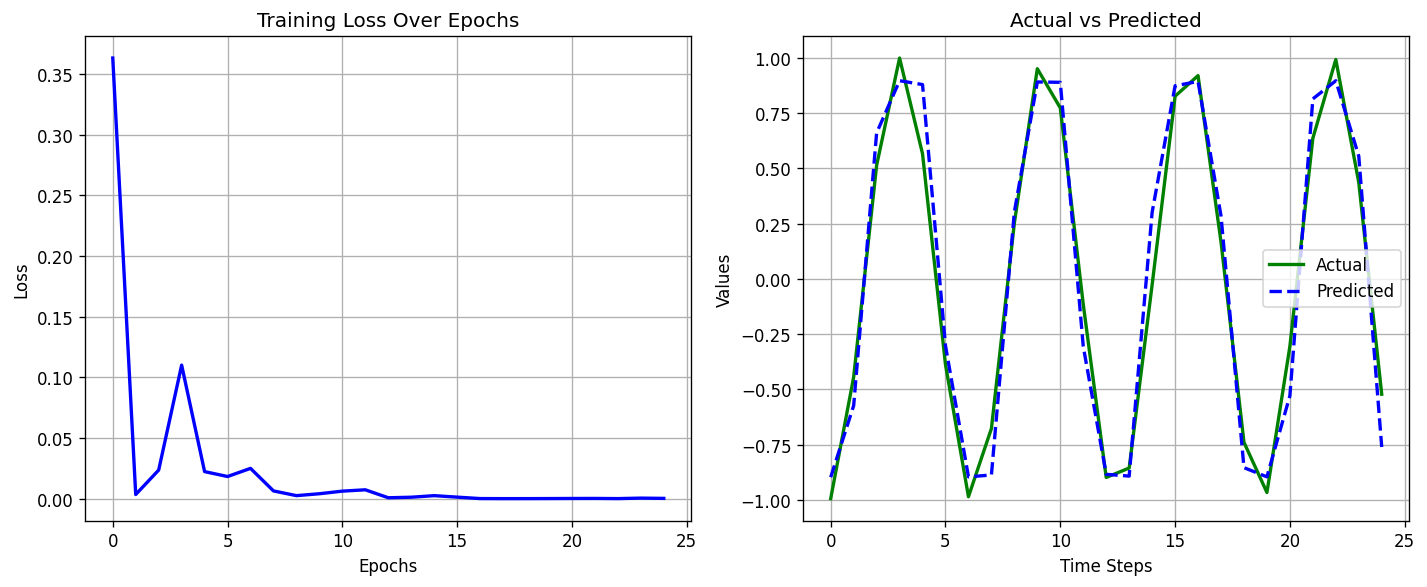

In [13]:
plt.figure(figsize=(12, 5), dpi=120)  # Increase figure size for clarity

# First subplot: Loss Curve
plt.subplot(1, 2, 1)  # (rows, columns, index)
plt.plot(rnn.Ovr_loss, color='blue', linewidth=2)
plt.xlabel("Epochs")  # Label for x-axis
plt.ylabel("Loss")  # Label for y-axis
plt.title("Training Loss Over Epochs")  # Title for the first plot
plt.grid(True)  # Add grid for better readability

# Second subplot: Actual vs Predicted
plt.subplot(1, 2, 2)
plt.plot(range(len(x_test)), y_test, label="Actual", color='green', linewidth=2)
plt.plot(range(len(x_test)), np.array(rnn.outputs).reshape(y_test.shape),
         label="Predicted", color='blue', linestyle='dashed', linewidth=2)
plt.xlabel("Time Steps")
plt.ylabel("Values")
plt.title("Actual vs Predicted")
plt.legend()  # Add legend to differentiate curves
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots